In [12]:
import numpy as np
import sys
sys.path.insert(0, '/data2/obj_detect/ssd/caffe/python')
import caffe
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 10)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

In [6]:
detections = np.load('/data2/obj_detect/learn/pybind11/learn/caffe2/caffe2/python/ssd_test/caffe2_det.npy')
# Parse the outputs.
det_label = detections[0,0,:,1]
det_conf = detections[0,0,:,2]
det_xmin = detections[0,0,:,3]
det_ymin = detections[0,0,:,4]
det_xmax = detections[0,0,:,5]
det_ymax = detections[0,0,:,6]

# Get detections with confidence higher than 0.6.
top_indices = [i for i, conf in enumerate(det_conf) if conf >= 0.6]

top_conf = det_conf[top_indices]
top_label_indices = det_label[top_indices].tolist()
top_xmin = det_xmin[top_indices]
top_ymin = det_ymin[top_indices]
top_xmax = det_xmax[top_indices]
top_ymax = det_ymax[top_indices]

(323, 481, 3)
(4, 81, 470, 323)
(193, -4, 345, 180)


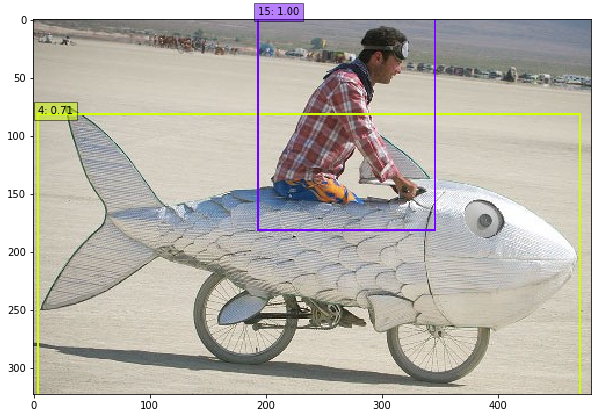

In [18]:
image = caffe.io.load_image('/data2/obj_detect/ssd/caffe/examples/images/fish-bike.jpg')
print image.shape
plt.imshow(image)
currentAxis = plt.gca()
colors = plt.cm.hsv(np.linspace(0, 1, 21)).tolist()

for i in xrange(top_conf.shape[0]):
    xmin = int(round(top_xmin[i] * image.shape[1]))
    ymin = int(round(top_ymin[i] * image.shape[0]))
    xmax = int(round(top_xmax[i] * image.shape[1]))
    ymax = int(round(top_ymax[i] * image.shape[0]))
    print (xmin, ymin, xmax, ymax)
    score = top_conf[i]
    label = int(top_label_indices[i])
    display_txt = '%s: %.2f'%(str(label), score)
    coords = (xmin, ymin), xmax-xmin+1, ymax-ymin+1
    color = colors[label]
    currentAxis.add_patch(plt.Rectangle(*coords, fill=False, edgecolor=color, linewidth=2))
    currentAxis.text(xmin, ymin, display_txt, bbox={'facecolor':color, 'alpha':0.5})